# What's in a Story?

The file `bldgstories.txt` lists the height of various buildings vs. the number of stories listed. Since a story isn't a well-defined unit of measurement, we'd like to see how many feet there are in a story.

In [1]:
%matplotlib inline
#Typical imports
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd

# plots on fleek
matplotlib.style.use('ggplot')

If you look at the raw data, you can see that the columns are separated by tabs, not commas. This changes the way we need to read the data in.

In [2]:
# Read the housing data from the txt file into a pandas dataframe
# delim_whitespace tells the read_table method to look for
# whitespace as a separator.

df = pd.read_table('data/bldgstories.txt', 
                   usecols=[1,2], delim_whitespace=True, header=0,
                   names=['Height in Feet', 'No. Stories'],
                   dtype=np.float32)


Let's take a look at the dataframe to ensure it looks the way we expect.

In [3]:
# Display the first few records
df.head()

,Height in Feet,No. Stories
0,770.0,54.0
1,677.0,47.0
2,428.0,28.0
3,410.0,38.0
4,371.0,29.0


Looks good! Now let's take a different view and consider possible models -- a scatter plot would be useful here.

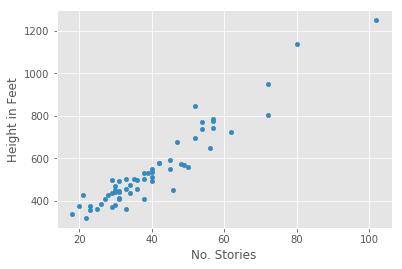

In [4]:
# Visualize the data as a scatter plot 
# with sq. ft. as the independent variable.
df.plot(x='No. Stories', y='Height in Feet', kind='scatter')

It seems a linear model could be appropriate in this case. How can we build it with TensorFlow?

In [5]:
# First we declare our placeholders
x = tf.placeholder(tf.float32, [None, 1]) 
y_ = tf.placeholder(tf.float32, [None, 1]) 

# Then our variables
W = tf.Variable(tf.zeros([1,1]))
b = tf.Variable(tf.zeros([1]))

# And now we can make our linear model: y = Wx + b
y = tf.matmul(x, W) + b

# Finally we choose our cost function (SSE in this case)
cost = tf.reduce_sum(tf.square(y_-y))

And here's where all the magic will happen:

In [6]:
# Call tf's gradient descent function with a learning rate and instructions to minimize the cost
learn_rate = .00000005
train = tf.train.GradientDescentOptimizer(learn_rate).minimize(cost)

# Prepare our data to be read into the training session. The data needs to match the 
# shape we specified earlier -- in this case (n, 1) where n is the number of data points.
xdata = np.asarray([[i] for i in df['No. Stories']])
y_data = np.asarray([[i] for i in df['Height in Feet']])

# Create a tensorflow session, initialize the variables, and run gradient descent
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        # This is the actual training step - feed_dict specifies the data to be read into
        # the placeholders x and y_ respectively.
        sess.run(train, feed_dict={x:xdata, y_:y_data})
    
    # Convert our variables from tensors to scalars so we can use them outside tf
    height_story = np.asscalar(sess.run(W))
    bias = np.asscalar(sess.run(b))

print("Model: y = %sx + %s" % (round(height_story,2), round(bias,2)))

Model: y = 13.22x + 0.98


Seems reasonable - according to our model, a story is about 13 feet. Let's plot the line so we can eyeball the fit.

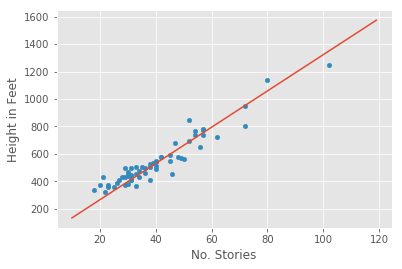

In [7]:
# Create the empty plot
fig, axes = plt.subplots()

# Draw the scatter plot on the axes we just created
df.plot(x='No. Stories', y='Height in Feet', kind='scatter', ax=axes)

# Create a range of x values to plug into our model
stories = np.arange(10, 120, 1)

# Plot the model
plt.plot(stories, height_story*stories + bias)
plt.show()

Everything seems believable. Nice work!